In [1]:
%matplotlib notebook

import sys, os
os.environ['PKG_CONFIG_PATH'] = '/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/pkgconfig'

import numpy as np
import pygalmesh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sys.path.append('..')
import mycode as code

--------------------------------------------------------------------------
but there are no active ports detected (or Open MPI was unable to use
them).  This is most certainly not what you wanted.  Check your
cables, subnet manager configuration, etc.  The openib BTL will be
ignored for this job.

  Local host: dv004
--------------------------------------------------------------------------


In [2]:
def plot_mesh(vertices, facets):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d', aspect='equal')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.plot_trisurf(*vertices.T, triangles=facets, cmap='Blues_r', linewidth=0.5, edgecolor='black', alpha=0.5)

In [3]:
v = np.array([
    [-1,  1, -1],
    [-1,  1,  1],
    [-1, -1, -1],
    [ 1,  1, -1],
])
f = np.array([
    [0, 1, 2],
    [0, 1, 3],
    [0, 2, 3],
    [1, 2, 3]
])

<IPython.core.display.Javascript object>


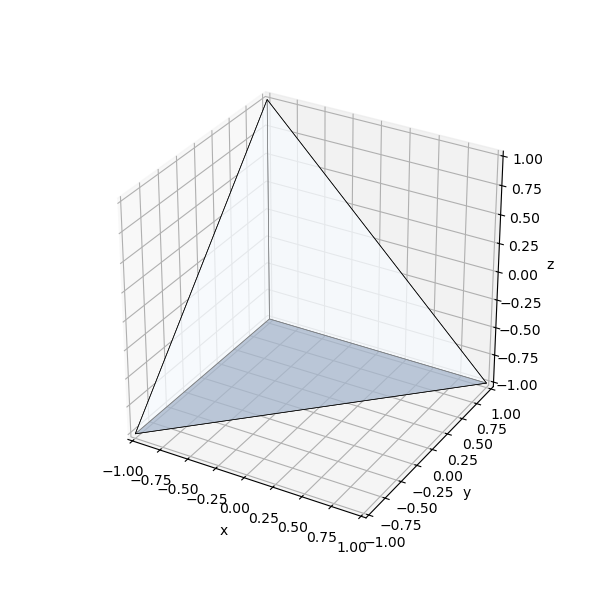

In [4]:
plot_mesh(v, f)

In [ ]:
%%time
ball = pygalmesh.Ball([0,0,0], 1.0)
mesh = pygalmesh.generate_mesh(ball, max_cell_circumradius=0.2)
print(mesh.points.shape)
print(mesh.cells[0].data.shape)
print(mesh.cells[1].data.shape)

In [ ]:
plot_mesh(mesh.points, mesh.cells[0].data)

In [ ]:
ds = code.imaging.Emory4DCTDataset('../data/Emory-4DCT')
ds

In [ ]:
ds.load_niftis()
ds.load_masks(roi='lung_combined_mask')

In [ ]:
ds[0].mask

In [ ]:
array = ds[0].mask.values[0].astype(np.uint16)
mesh = pygalmesh.generate_from_array(array, voxel_size=ds[0].resolution, max_cell_circumradius=5.0)
print(mesh.points.shape)
print(mesh.cells[0].data.shape)
print(mesh.cells[1].data.shape)

In [ ]:
plot_mesh(mesh.points, mesh.cells[0].data)